In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [1]:
final_db = pd.read_csv('../../clean_data_2_renamed.csv')
sep_discr = pd.read_csv('../../test_run_1.csv')

NameError: name 'pd' is not defined

In [4]:
# Get a list of column names in the DataFrame
print(final_db.columns.tolist())

print(sep_discr.columns.tolist())

['discrimination_occurred', 'respodent_id', 'interview_country', 'age', 'gender', 'job_situation', 'ethnic_group', 'household_income', 'income_imputed', 'religion', 'marital status', 'past_discrim_exp', 'extent_of_discrim', 'can_make_ends_meet', 'rent_or_own_housing', 'searched_for_housing', 'urbanization_degree', 'health_status', 'has_illness', 'health_impact_on_life', 'insurance_coverage', 'violence_exp_by_family', 'aware_of_support_org', 'friends_from_diff_ethnicity', 'friends_from_majority', 'neighbour_ethnicity', 'social_transfers', 'poverty_risk', 'citizenship_status', 'stopped_by_police']
['EUD01_01', 'EUD01_02', 'EUD01_03', 'EUD01_04', 'EUD01_05', 'EUD01_06', 'EUD01_07', 'EUD01_08', 'EUD01_09', 'EUD01_96', 'EUD01_97', 'EUD01_99', 'id', 'Generation', 'HH02', 'HH03', 'HH04', 'IN02', 'IN05', 'SI03_3_H', 'PB01_mod', 'S01_mod', 'SI06_mod', 'HLS02_mod', 'DHO01_mod', 'DEGURBA_mod', 'DHE01_mod', 'DHE02_mod', 'DHE03_mod', 'DHE04_mod', 'RA04_mod', 'VV10', 'res_stat_mod_1', 'arop_mod', 'R

### Percentage of discrimination per country

In [31]:
# Check distribution of the binary discrimination variable
print(final_db['discrimination_occurred'].value_counts())

discrimination_occurred
0    8236
1    5170
Name: count, dtype: int64


In [32]:
# Check for missing values in country of origin variable
print("Number of missing values in Country of Interview:", final_db['interview_country'].isnull().sum())

Number of missing values in Country of Interview: 0


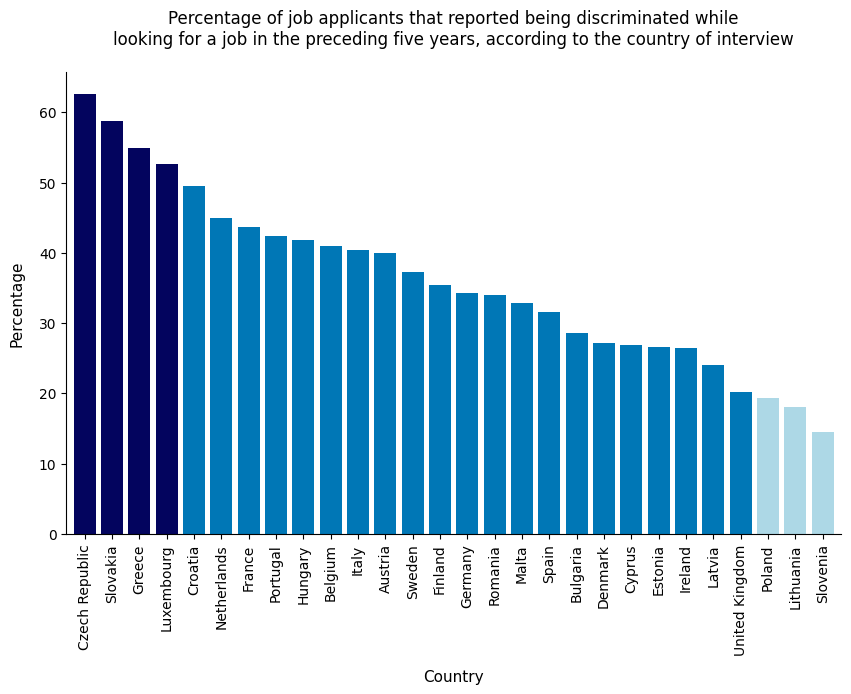

In [51]:
# Load the country codes CSV file with semicolon separator
country_codes = pd.read_csv('../01_data/country_codes.csv', sep=';',encoding='latin1')

# Assuming final_db is your DataFrame
# Group by the 'IN05' column (country) and calculate the percentage of 1s in 'discrimination_occurred'
percentages = final_db.groupby('interview_country')['discrimination_occurred'].mean() * 100

# Convert 'percentages' Series to DataFrame and reset index to have 'IN05' as a column
percentages_df = percentages.reset_index()

# Merge 'percentages_df' with 'country_codes' DataFrame based on the 'IN05' column
merged_data = pd.merge(percentages_df, country_codes, left_on='interview_country', right_on='Value', how='left')

# Sort the merged data by percentage in descending order
merged_data_sorted = merged_data.sort_values(by='discrimination_occurred', ascending=False)

# Function to determine bar color based on value
def get_bar_color(value):
    if value > 50:
        return '#03045e'
    elif value >= 20:
        return '#0077b6'
    else:
        return 'lightblue'

# Create bar colors list based on values
bar_colors = merged_data_sorted['discrimination_occurred'].apply(get_bar_color).tolist()

# Plot the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(merged_data_sorted['Label'], merged_data_sorted['discrimination_occurred'], color=bar_colors, edgecolor='none')

# Add titles and labels
plt.title('Percentage of job applicants that reported being discriminated while\nlooking for a job in the preceding five years, according to the country of interview', fontsize=12, pad=20)
plt.xlabel('Country', fontsize=11, labelpad=10)
plt.ylabel('Percentage', fontsize=11, labelpad=10)

# Rotate x-axis labels for better readability and make labels smaller
plt.xticks(rotation=90, fontsize=10)

# Remove outline except for the axes themselves
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)

# Adjust the layout to reduce space between the y-axis and the first bar and the last bar and the end of the plot
plt.margins(x=0.01, tight=True)

# Save the image
output_dir = "../04_graphs"
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, "perc_country.png")
plt.savefig(output_path, bbox_inches='tight')

# Display the plot
plt.show()

### Type of discrimination by age range

In [7]:
unique_values = sep_discr['HH02'].unique()
unique_values_sorted = sorted(unique_values)
print("Unique values sorted:", unique_values_sorted)

# Find maximum value
max_value = sep_discr['HH02'].max()

# Find minimum value
min_value = sep_discr['HH02'].min()

print("Maximum value of HH02:", max_value)
print("Minimum value of HH02:", min_value)

Unique values sorted: [16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 76.0, 77.0, 79.0, 81.0, 82.0, 83.0]
Maximum value of HH02: 83.0
Minimum value of HH02: 16.0


In [68]:
# Create age ranges using pd.cut()
bins = [15, 19, 29, 39, 49, 59, 69, 79, 83]
labels = ["16 to 19", "20 to 29", "30 to 39", "40 to 49", "50 to 59", "60 to 69", "70 to 79", "80 or older"]

sep_discr['age_range'] = pd.cut(sep_discr['HH02'], bins=bins, labels=labels, right=True, include_lowest=True)

col_check = ['HH02', 'age_range']
sep_discr[col_check].head(15)

,HH02,age_range
0,37.0,30 to 39
1,30.0,30 to 39
2,35.0,30 to 39
3,42.0,40 to 49
4,39.0,30 to 39
5,26.0,20 to 29
6,18.0,16 to 19
7,28.0,20 to 29
8,21.0,20 to 29
9,28.0,20 to 29


C:\Users\lefco\AppData\Local\Temp\ipykernel_2708\2860937881.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_range_counts = sep_discr.groupby('age_range')[var].sum()
C:\Users\lefco\AppData\Local\Temp\ipykernel_2708\2860937881.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_range_counts = sep_discr.groupby('age_range')[var].sum()
C:\Users\lefco\AppData\Local\Temp\ipykernel_2708\2860937881.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future

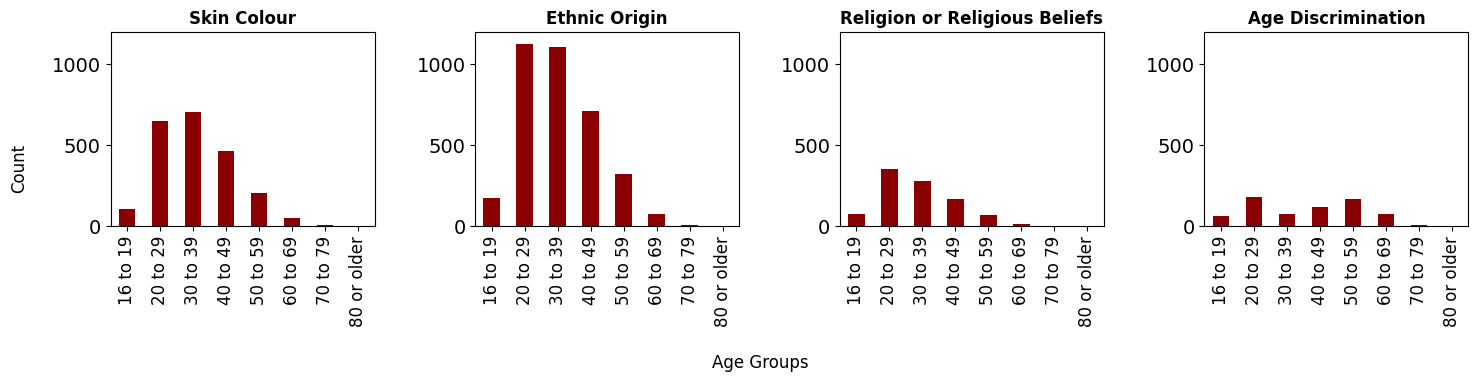

In [72]:
# List of vars to include
binary_vars1 = ['EUD01_01', 'EUD01_02', 'EUD01_03', 'EUD01_04']

# Dictionary to map variable names to titles
var_titles = {
    'EUD01_01': 'Skin Colour',
    'EUD01_02': 'Ethnic Origin',
    'EUD01_03': 'Religion or Religious Beliefs',
    'EUD01_04': 'Age Discrimination'
}

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plotting
for i, var in enumerate(binary_vars1):
    # Group by age_range and count the occurrences of the binary variable
    age_range_counts = sep_discr.groupby('age_range')[var].sum()
    age_range_counts.plot(kind='bar', color='darkred', ax=axes[i], rot=45)  # Dark red bars
    axes[i].set_title(var_titles[var], fontsize=12, fontweight='bold', color='black')  # Set the title using the dictionary
    axes[i].set_xlabel('')  # Remove individual x-axis labels
    axes[i].set_ylabel('')  # Remove individual y-axis labels
    axes[i].set_ylim([0, 1200])  # Set y-axis limits
    axes[i].grid(False)  # Remove grid
    axes[i].tick_params(axis='x', rotation=90, labelsize=12)  # Rotate x-axis labels by 90 degrees
    axes[i].tick_params(axis='y', labelsize=14)  # Increase y-axis label size

# Set common y-axis label
fig.text(0, 0.5, 'Count', va='center', rotation='vertical', fontsize=12)

# Set common x-axis label
fig.text(0.5, 0, 'Age Groups', ha='center', fontsize=12)

# Adjust layout with padding
plt.tight_layout(pad=3.0)

# Save the image
output_dir = "../04_graphs"
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, "discr_age.png")
plt.savefig(output_path)

plt.show()

C:\Users\lefco\AppData\Local\Temp\ipykernel_10072\1022104062.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_range_counts = final_db.groupby('age_range')[var].sum()
C:\Users\lefco\AppData\Local\Temp\ipykernel_10072\1022104062.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_range_counts = final_db.groupby('age_range')[var].sum()
C:\Users\lefco\AppData\Local\Temp\ipykernel_10072\1022104062.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the futur

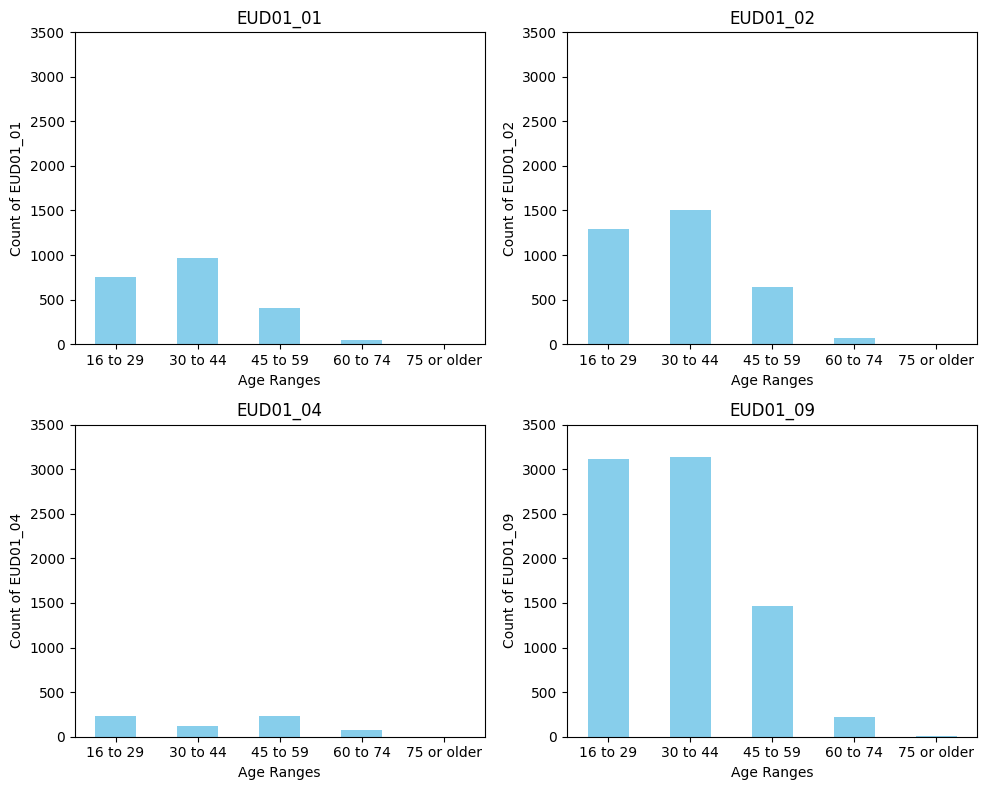

In [39]:
# List of binary variables to include
binary_vars2 = ['EUD01_01', 'EUD01_02', 'EUD01_04', 'EUD01_09']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plotting
for i, var in enumerate(binary_vars2):
    # Group by age_range and count the occurrences of the binary variable
    age_range_counts = final_db.groupby('age_range')[var].sum()
    age_range_counts.plot(kind='bar', color='skyblue', ax=axes[i], rot=0)
    axes[i].set_title(var)
    axes[i].set_xlabel('Age Ranges')
    axes[i].set_ylabel('Count of ' + var)
    axes[i].set_ylim([0, 3500])  # Set y-axis limits
    axes[i].grid(False)  # Remove grid

# Adjust layout
plt.tight_layout()
plt.show()

### Basic descriptives

**Gender, ethnic group, religion and job situation**

In [64]:
print(final_db['job_situation'].value_counts())
# Calculate the value counts of job_situation as percentages
print("Job Situation Value Counts (Percentages):", final_db['job_situation'].value_counts(normalize=True) * 100)

job_situation
1.0     5155
4.0     4861
5.0     1213
7.0      959
2.0      540
8.0      215
10.0     194
6.0      193
3.0       33
9.0       20
96.0      20
99.0       2
97.0       1
Name: count, dtype: int64
Job Situation Value Counts (Percentages): job_situation
1.0     38.452932
4.0     36.259884
5.0      9.048187
7.0      7.153513
2.0      4.028047
8.0      1.603760
10.0     1.447113
6.0      1.439654
3.0      0.246158
9.0      0.149187
96.0     0.149187
99.0     0.014919
97.0     0.007459
Name: proportion, dtype: float64


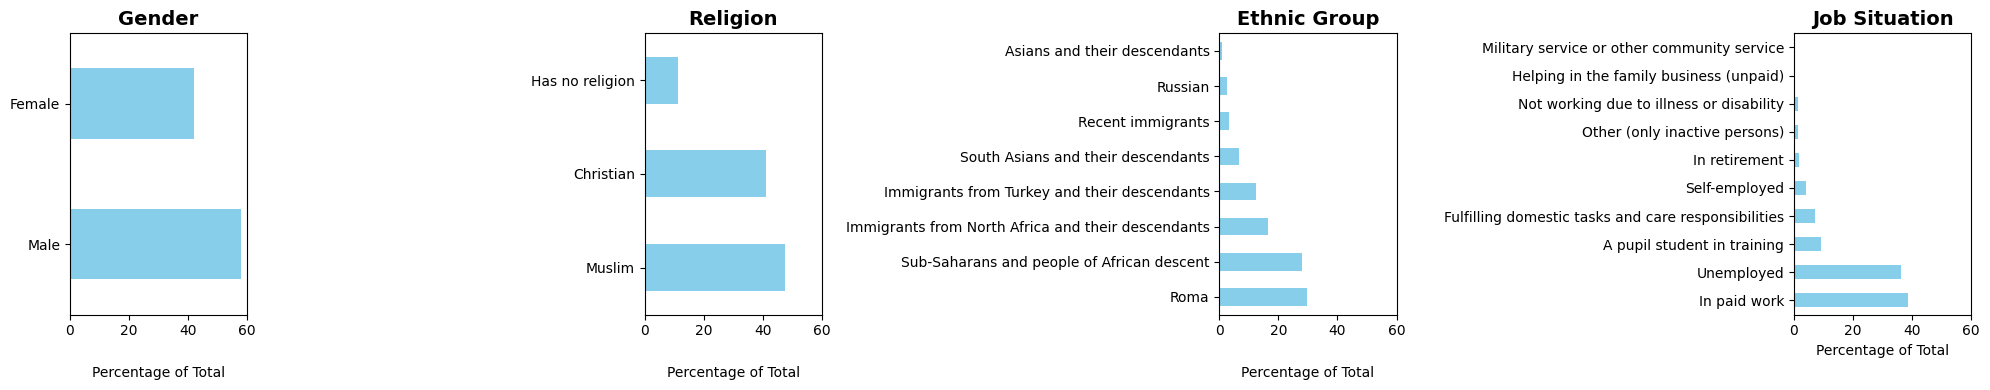

In [35]:
# Define the mapping dictionaries
gender_labels = {1: 'Male', 2: 'Female'}
ethnic_group_labels = {
    1: 'Asians and their descendants',
    2: 'Immigrants from Turkey and their descendants',
    3: 'Immigrants from North Africa and their descendants',
    4: 'Recent immigrants',
    5: 'Roma',
    6: 'Russian',
    7: 'South Asians and their descendants',
    8: 'Sub-Saharans and people of African descent'
}
religion_labels = {0: 'Has no religion', 1: 'Christian', 2: 'Muslim'}
job_situation_labels = {
    1: 'In paid work',
    2: 'Self-employed',
    3: 'Helping in the family business (unpaid)',
    4: 'Unemployed',
    5: 'A pupil student in training',
    6: 'Not working due to illness or disability',
    7: 'Fulfilling domestic tasks and care responsibilities',
    8: 'In retirement',
    9: 'Military service or other community service',
    10: 'Other (only inactive persons)',
    96: 'Refusal',
    97: 'Doesn\'t understand the question',
    99: 'Don\'t know',
    -2: 'Not on route'
}

# Apply the mapping to create label columns
final_db['gender_label'] = final_db['gender'].map(gender_labels)
final_db['ethnic_group_label'] = final_db['ethnic_group'].map(ethnic_group_labels)
final_db['religion_label'] = final_db['religion'].map(religion_labels)
final_db['job_situation_label'] = final_db['job_situation'].map(job_situation_labels)

# Define a function to plot bar plots for a given column
def plot_percentage_bar(df, column, title, ax):
    percentage = df[column].value_counts(normalize=True) * 100
    if column == 'job_situation_label':
        percentage = percentage.drop(index=[96, 97, 99], errors='ignore')
    percentage.plot(kind='barh', ax=ax, color='skyblue', edgecolor='black', linewidth=0)  # Remove outline
    ax.set_title(title, fontsize=14, fontweight='bold')  # Set title font size and weight
    ax.set_xlabel('Percentage of Total', labelpad=20)
    ax.set_ylabel('', labelpad=10)
    ax.set_xlim([0, 60])  # Set x-axis limits

# Create the grid of bar plots with uneven spacing
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

plot_percentage_bar(final_db, 'gender_label', 'Gender', axes[0])
plot_percentage_bar(final_db, 'religion_label', 'Religion', axes[1])
plot_percentage_bar(final_db, 'ethnic_group_label', 'Ethnic Group', axes[2])

# Filter out unwanted values before plotting for job situation
job_situation_data = final_db['job_situation_label'].loc[~final_db['job_situation_label'].isin(['Refusal', 'Doesn\'t understand the question', 'Don\'t know'])]
job_situation_data.value_counts(normalize=True).mul(100).plot(kind='barh', ax=axes[3], color='skyblue', edgecolor='black', linewidth=0)
axes[3].set_title('Job Situation', fontsize=14, fontweight='bold')
axes[3].set_xlabel('Percentage of Total')
axes[3].set_ylabel('')
axes[3].set_xlim([0, 60])  # Set x-axis limits

plt.tight_layout()
plt.show()

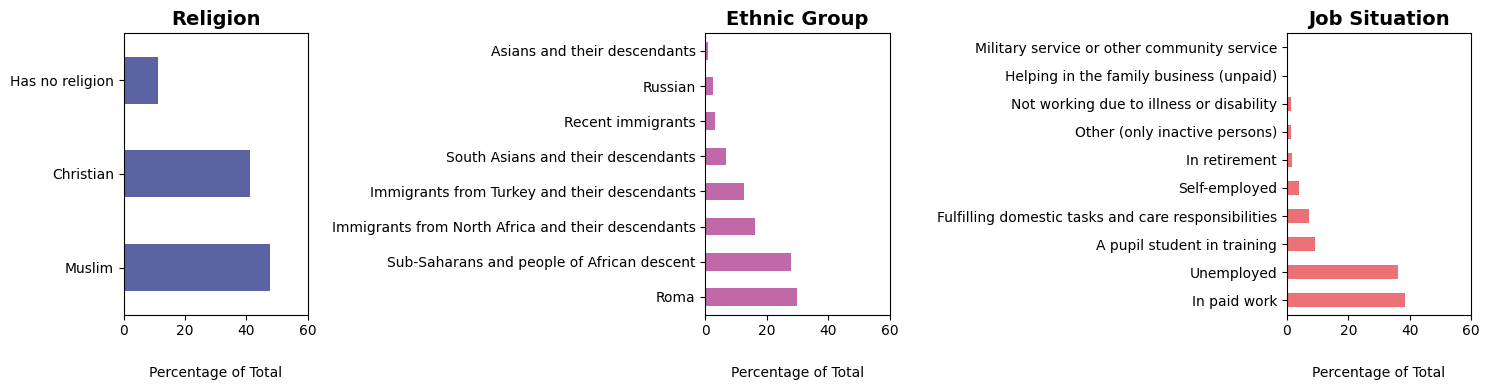

In [61]:
# Define the mapping dictionaries
gender_labels = {1: 'Male', 2: 'Female'}
ethnic_group_labels = {
    1: 'Asians and their descendants',
    2: 'Immigrants from Turkey and their descendants',
    3: 'Immigrants from North Africa and their descendants',
    4: 'Recent immigrants',
    5: 'Roma',
    6: 'Russian',
    7: 'South Asians and their descendants',
    8: 'Sub-Saharans and people of African descent'
}
religion_labels = {0: 'Has no religion', 1: 'Christian', 2: 'Muslim'}
job_situation_labels = {
    1: 'In paid work',
    2: 'Self-employed',
    3: 'Helping in the family business (unpaid)',
    4: 'Unemployed',
    5: 'A pupil student in training',
    6: 'Not working due to illness or disability',
    7: 'Fulfilling domestic tasks and care responsibilities',
    8: 'In retirement',
    9: 'Military service or other community service',
    10: 'Other (only inactive persons)',
    96: 'Refusal',
    97: 'Doesn\'t understand the question',
    99: 'Don\'t know',
    -2: 'Not on route'
}

# Apply the mapping to create label columns
final_db['gender_label'] = final_db['gender'].map(gender_labels)
final_db['ethnic_group_label'] = final_db['ethnic_group'].map(ethnic_group_labels)
final_db['religion_label'] = final_db['religion'].map(religion_labels)
final_db['job_situation_label'] = final_db['job_situation'].map(job_situation_labels)

# Define a function to plot bar plots for a given column
def plot_percentage_bar(df, column, title, ax, color):
    percentage = df[column].value_counts(normalize=True) * 100
    if column == 'job_situation_label':
        percentage = percentage.drop(index=[96, 97, 99], errors='ignore')
    percentage.plot(kind='barh', ax=ax, color=color, edgecolor='black', linewidth=0)  # Remove outline
    ax.set_title(title, fontsize=14, fontweight='bold')  # Set title font size and weight
    ax.set_xlabel('Percentage of Total', labelpad=20)
    ax.set_ylabel('', labelpad=10)
    ax.set_xlim([0, 60])  # Set x-axis limits

# Create the grid of bar plots with uneven spacing
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Adjust the layout to provide more space between subplots
plt.subplots_adjust(wspace=0.5)

plot_percentage_bar(final_db, 'religion_label', 'Religion', axes[0], '#5C63A2')
plot_percentage_bar(final_db, 'ethnic_group_label', 'Ethnic Group', axes[1], '#C068A8')

# Filter out unwanted values before plotting for job situation
job_situation_data = final_db['job_situation_label'].loc[~final_db['job_situation_label'].isin(['Refusal', 'Doesn\'t understand the question', 'Don\'t know'])]
job_situation_data.value_counts(normalize=True).mul(100).plot(kind='barh', ax=axes[2], color='#EC7176', edgecolor='black', linewidth=0)
axes[2].set_title('Job Situation', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Percentage of Total', labelpad=20)
axes[2].set_ylabel('')
axes[2].set_xlim([0, 60])  # Set x-axis limits

# Save the image
output_dir = "../04_graphs"
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, "basics_01.png")
plt.savefig(output_path, bbox_inches='tight')

plt.tight_layout()
plt.show()

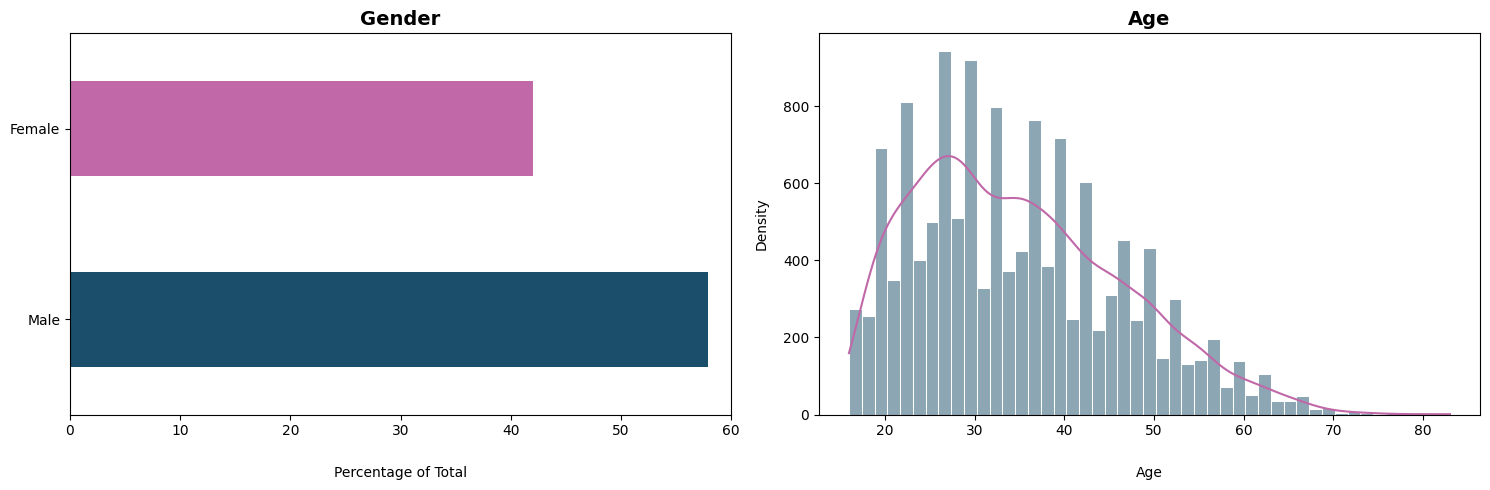

In [62]:
# Define the mapping dictionaries and create label columns
gender_labels = {1: 'Male', 2: 'Female'}
final_db['gender_label'] = final_db['gender'].map(gender_labels)

# Define a function to plot bar plots for a given column
def plot_percentage_bar(df, column, title, ax):
    percentage = df[column].value_counts(normalize=True) * 100
    percentage.plot(kind='barh', ax=ax, color=['#1B4E6B', '#C068A8'], edgecolor='none', linewidth=0)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel('Percentage of Total', labelpad=20)
    ax.set_ylabel('', labelpad=10)
    ax.set_xlim([0, 60])

# Define a function to plot distribution plot for age
def plot_age_distribution(df, ax):
    sns.histplot(df['age'], kde=True, ax=ax, color='#1B4E6B', edgecolor='white')
    ax.set_title('Age', fontsize=14, fontweight='bold')  # Changed title to 'Age'
    ax.set_xlabel('Age', labelpad=20)
    ax.set_ylabel('Density', labelpad=10)
    ax.lines[0].set_color('#C068A8')  # Set the color of the distribution line to #F4AB33

# Create the grid of plots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot gender distribution
plot_percentage_bar(final_db, 'gender_label', 'Gender', axes[0])

# Plot age distribution
plot_age_distribution(final_db, axes[1])

# Save the image
output_dir = "../04_graphs"
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, "basics_02.png")
plt.savefig(output_path, bbox_inches='tight')

plt.tight_layout()
plt.show()

### To help in the text

In [65]:
# Calculate the mean and median of the age variable
age_mean = final_db['age'].mean()
age_median = final_db['age'].median()

print("Mean age:", age_mean)
print("Median age:", age_median)

Mean age: 34.876398627480235
Median age: 33.0


In [66]:
# Calculate the value counts of religion as percentages
print("Religion Value Counts (Percentages):", final_db['religion'].value_counts(normalize=True) * 100)

Religion Value Counts (Percentages): religion
2.0    47.620468
1.0    41.235268
0.0    11.144264
Name: proportion, dtype: float64
